# Haar Cascades for Face Detection

"Face detection is a computer technology that determines the locations and sizes of human faces in arbitrary (digital) images. It detects facial features and ignores anything else, such as buildings, trees and bodies. Face detection can be regarded as a more general case of face localization. In face localization, the task is to find the locations and sizes of a known number of faces (usually one)." - wiki - Face detection

### Haar features

OpenCV's algorithm is currently using the following Haar-like features which are the input to the basic classifiers:

<img src='images/haar_features.png'>

<img src='images/face_and_features.png'>

**Cascade of Classifiers**

Instead of applying all features on a window (subregion of an image), group the features into different stages of classifiers and apply one-by-one. (Normally first few stages will contain very less number of features). 
* If a window fails the first stage, discard it. We don't consider remaining features on it. 
* If it passes, apply the second stage of features and continue the process. 
* The window which passes all stages is a face region.

<img src='images/stages.png'>

**OpenCV's pre-trained classifiers**

OpenCV comes with a few Haar Cascade detectors already trained. If you want to train your own classifier for any object like a banana, car, etc. you can use OpenCV to create one. Its full details are given [here](https://docs.opencv.org/3.0-beta/doc/user_guide/ug_traincascade.html?highlight=train%20cascade).

OpenCV already contains many pre-trained classifiers for face, eyes, smile etc. Those XML files are stored in opencv/data/haarcascades/ or opencv/haarcascades/ folder:

```
haarcascade_eye_tree_eyeglasses.xml   haarcascade_mcs_leftear.xml
haarcascade_eye.xml                   haarcascade_mcs_lefteye.xml
haarcascade_frontalface_alt2.xml      haarcascade_mcs_mouth.xml
haarcascade_frontalface_alt_tree.xml  haarcascade_mcs_nose.xml
haarcascade_frontalface_alt.xml       haarcascade_mcs_rightear.xml
haarcascade_frontalface_default.xml   haarcascade_mcs_righteye.xml
haarcascade_fullbody.xml              haarcascade_mcs_upperbody.xml
haarcascade_lefteye_2splits.xml       haarcascade_profileface.xml
haarcascade_lowerbody.xml             haarcascade_righteye_2splits.xml
haarcascade_mcs_eyepair_big.xml       haarcascade_smile.xml
haarcascade_mcs_eyepair_small.xml     haarcascade_upperbody.xml
```

For now, we will be using a pre-trained classifier to detect faces. 
1. First we need to load the required XML classifiers. 
2. Then load our input image (or video) in grayscale mode since face detection relies on patterns of intensity in an image.
3. We use cv2.CascadeClassifier.detectMultiScale() function to find faces or eyes, and it is defined like this:
```
cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) 
```

Where the parameters are:
* `image` : Matrix of the type CV_8U containing an image where objects are detected.
* `scaleFactor` : Parameter specifying how much the image size is reduced at each image scale.
    * This scale factor is used to create scale pyramid as shown in the picture. Suppose, the scale factor is 1.03, it means we're using a small step for resizing, i.e. reduce size by 3 %, we increase the chance of a matching size with the model for detection is found, while it's expensive.

<img src='images/image_scale.png'>

* `minNeighbors` : Parameter specifying how many neighbors each candidate rectangle should have to retain it. This parameter will affect the quality of the detected faces: higher value results in less detections but with higher quality. We're using 5 in the code.
* `flags` : Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
* `minSize` : Minimum possible object size. Objects smaller than that are ignored.
* `maxSize` : Maximum possible object size. Objects larger than that are ignored.

4. Present the results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

%matplotlib inline

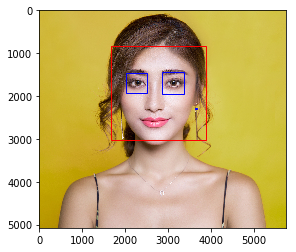

In [10]:
import numpy as np
import cv2

# Load in the face detector XML file
face_cascade = cv2.CascadeClassifier('/usr/local/Cellar/opencv/3.4.1_5/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/usr/local/Cellar/opencv/3.4.1_5/share/OpenCV/haarcascades/haarcascade_eye.xml')

# Read in an image
image = cv2.imread('images/face2.jpg')

# Then, we need to load input image in grayscale mode:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect the faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)

# Create figure and axes
fig, ax = plt.subplots(1)

ax.imshow(img)

for (x,y,w,h) in faces:
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
for (x,y,w,h) in eyes:
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
    
plt.show()


### Reference

[OBJECT DETECTION : FACE DETECTION USING HAAR CASCADE CLASSFIERS](http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php)